# Topology Optimization Dataset - Visualization & Validation

This notebook provides 3D visualization and validation of ML dataset pairs.

**Usage**: Set `EXP_PATH` below to point to your experiment folder, then run all cells.

In [40]:
# Configuration - CHANGE THIS TO YOUR EXPERIMENT FOLDER
EXP_PATH = "data/experiments/EXP_20260131_152834_128x64x64" 

# Backend for PyVista in Jupyter
import pyvista as pv
pv.set_jupyter_backend('static')  # Use 'static' for screenshots, 'ipyvtklink' for interactive

## 1. Load Dataset

In [41]:
from topopt_ml.io import load_sample, load_dataset_index

# Load dataset index

dataset_index = load_dataset_index(EXP_PATH)
print(f"Found {len(dataset_index)} samples in dataset")

print("\nSample metadata:")
for i, sample in enumerate(dataset_index[:3]):
    print(f"  Sample {sample['sample_id']}: Load at {sample['load_center']}, "
          f"Radius: {sample['load_radius']:.2f}, Time: {sample['solve_time']:.2f}s")

Found 5 samples in dataset

Sample metadata:
  Sample 0001: Load at [64, 34], Radius: 7.13, Time: 86.54s
  Sample 0002: Load at [48, 17], Radius: 7.89, Time: 99.08s
  Sample 0003: Load at [39, 34], Radius: 6.87, Time: 55.80s


In [42]:
# Load first sample
sample_id = dataset_index[0]['sample_id']
X, Y = load_sample(EXP_PATH, sample_id)

print(f"Input tensor shape: {X.shape}")
print(f"Target tensor shape: {Y.shape}")
print(f"\nInput channels:")
print(f"  Ch 0 (Solid): {X[:,:,:,0].sum():.0f} elements")
print(f"  Ch 3 (Fz): {X[:,:,:,3].sum():.2f} N")
print(f"\nDensity statistics:")
print(f"  Range: [{Y.min():.4f}, {Y.max():.4f}]")
print(f"  Mean: {Y.mean():.4f}")

Input tensor shape: (128, 64, 64, 4)
Target tensor shape: (128, 64, 64)

Input channels:
  Ch 0 (Solid): 524288 elements
  Ch 3 (Fz): -2000.00 N

Density statistics:
  Range: [0.0000, 1.0000]
  Mean: 0.1500


## 2. Structure Visualization

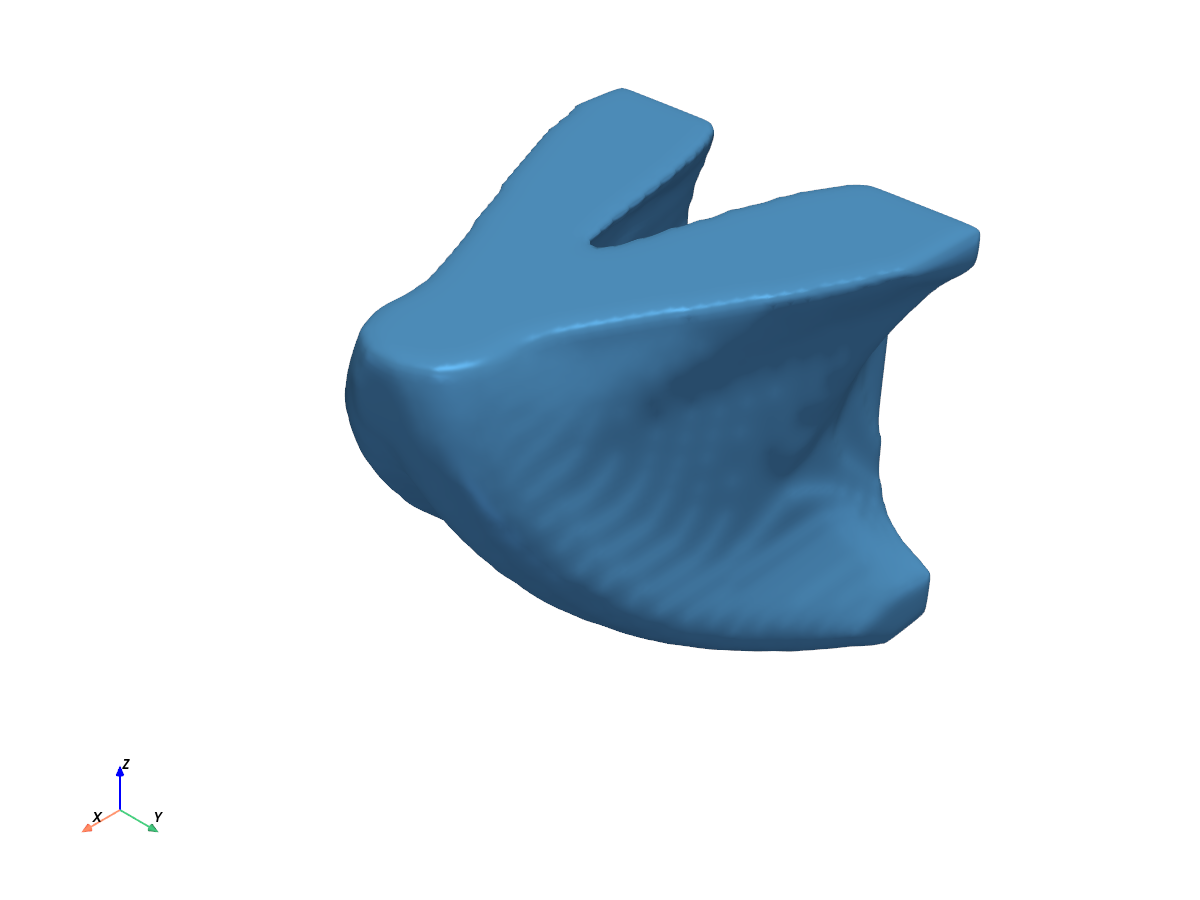

PolyData (0x1663c3e80)
  N Cells:    28294
  N Points:   28296
  N Strips:   0
  X Bounds:   9.639e-05, 7.300e+01
  Y Bounds:   2.501e-02, 6.400e+01
  Z Bounds:   8.198e-06, 6.400e+01
  N Arrays:   2

In [43]:
from topopt_ml.visualization import render_density

# Render the optimized structure
render_density(Y, threshold=0.3, show=True)

## 3. Load Visualization

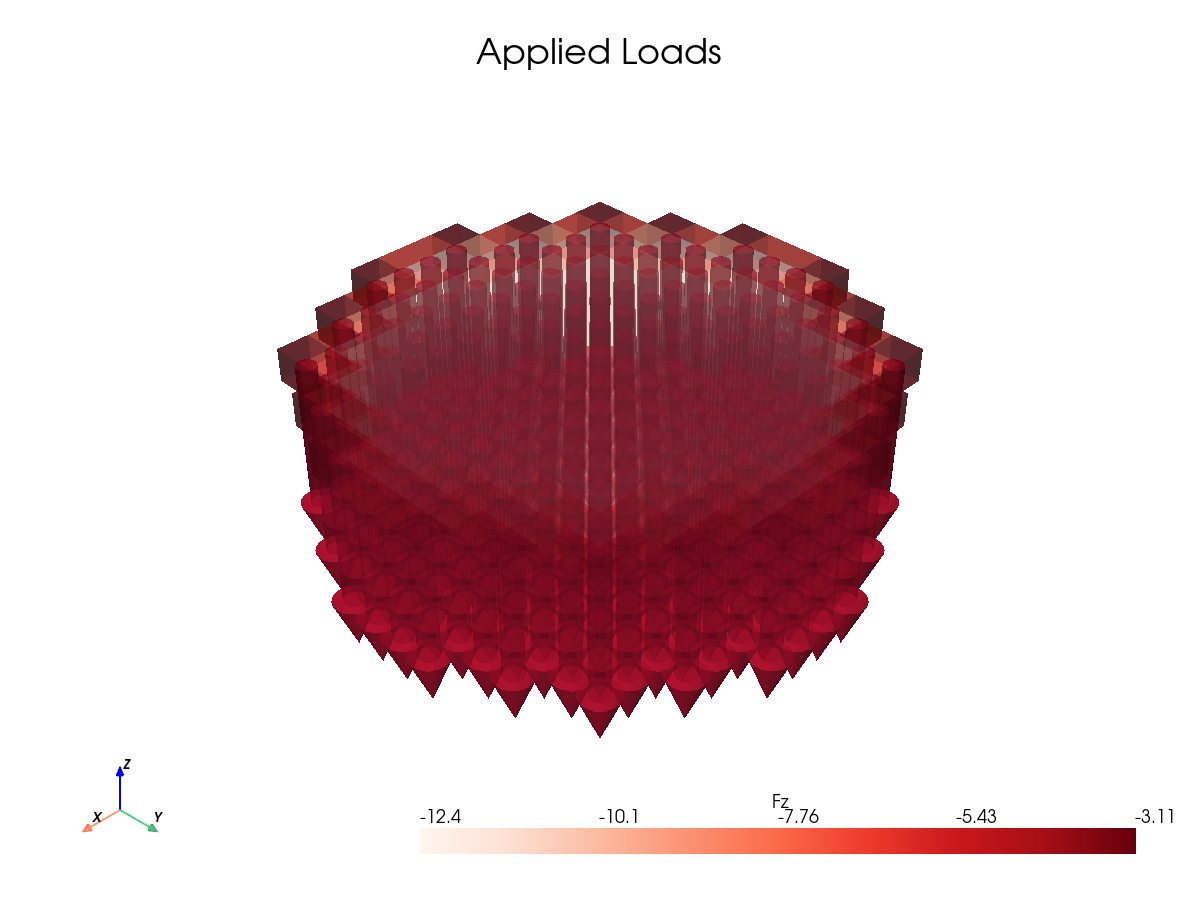

In [44]:
from topopt_ml.visualization import render_loads

# Render applied loads
render_loads(X, show=True)

## 4. Side-by-Side Comparison

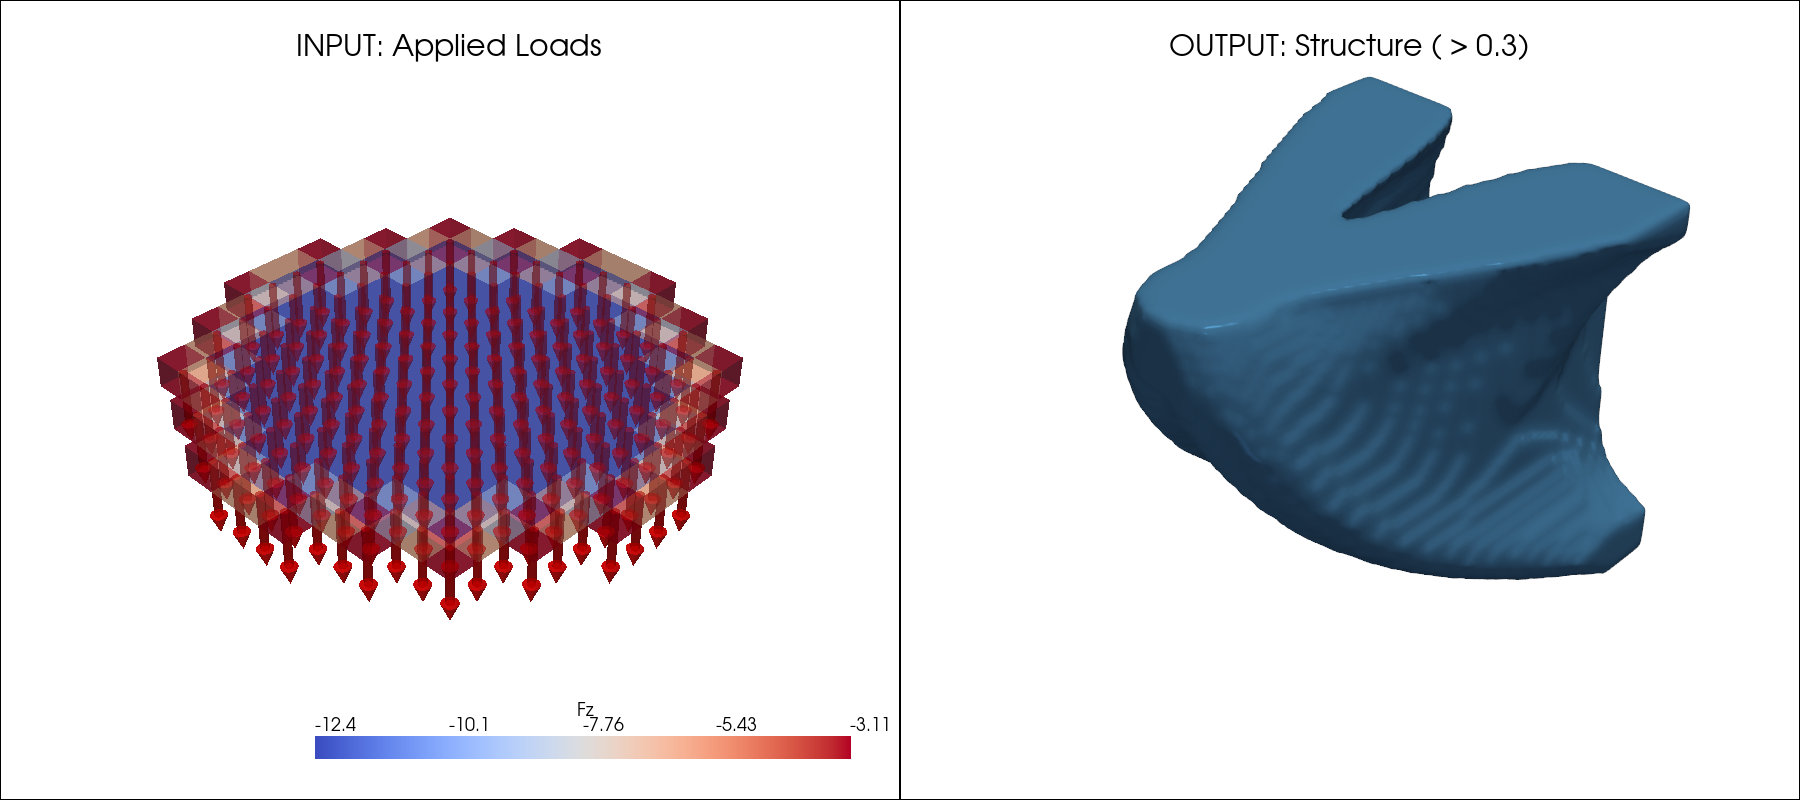

In [45]:
from topopt_ml.visualization import compare_input_output

# Side-by-side comparison of input loads and output structure
compare_input_output(X, Y, threshold=0.3, show=True)

## 5. Physical Consistency Check

In [46]:
from topopt_ml.visualization import check_physical_consistency

# Check physical consistency
results = check_physical_consistency(X, Y, verbose=True)


  Physical Consistency Checks:
    ✓ Load applied: True (-2000.00 N)
    ✓ Structure exists: True
    ✓ Volume fraction: 0.150
    ✓ Load center: (63.5, 33.5, 63.0)
    ✓ Structure-load distance: 41.5 elements


## 6. Full Sample Validation (Math + Visual)


  Physical Consistency Checks:
    ✓ Load applied: True (-2000.00 N)
    ✓ Structure exists: True
    ✓ Volume fraction: 0.150
    ✓ Load center: (63.5, 33.5, 63.0)
    ✓ Structure-load distance: 41.5 elements

Sample 0001:
  Input shape: (128, 64, 64, 4)
  Target shape: (128, 64, 64)
  Force sum (Fz): -2000.00 N
  Density range: [0.0000, 1.0000]
  Density mean: 0.1500


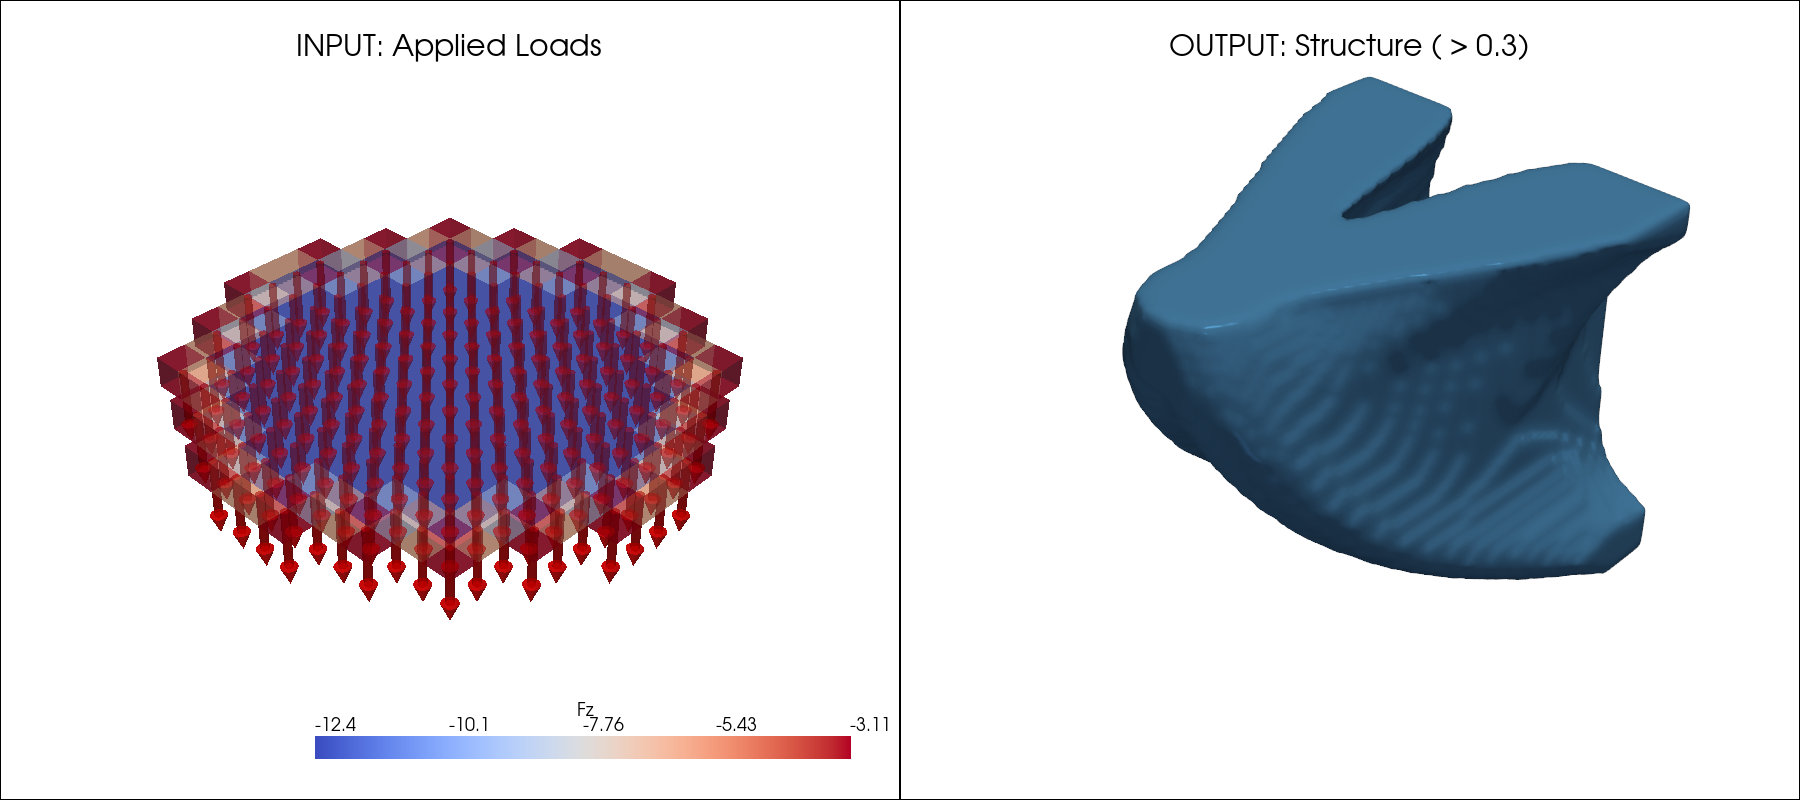

  ✅ Sample 0001 validated



In [47]:
from topopt_ml.visualization import validate_sample_visual

# Complete validation with both math checks and visualization
results = validate_sample_visual(X, Y, sample_id=sample_id, threshold=0.3, show_plot=True)

## 7. Multi-Sample Gallery


Sample: 0001

  Physical Consistency Checks:
    ✓ Load applied: True (-2000.00 N)
    ✓ Structure exists: True
    ✓ Volume fraction: 0.150
    ✓ Load center: (63.5, 33.5, 63.0)
    ✓ Structure-load distance: 41.5 elements

Sample 0001:
  Input shape: (128, 64, 64, 4)
  Target shape: (128, 64, 64)
  Force sum (Fz): -2000.00 N
  Density range: [0.0000, 1.0000]
  Density mean: 0.1500


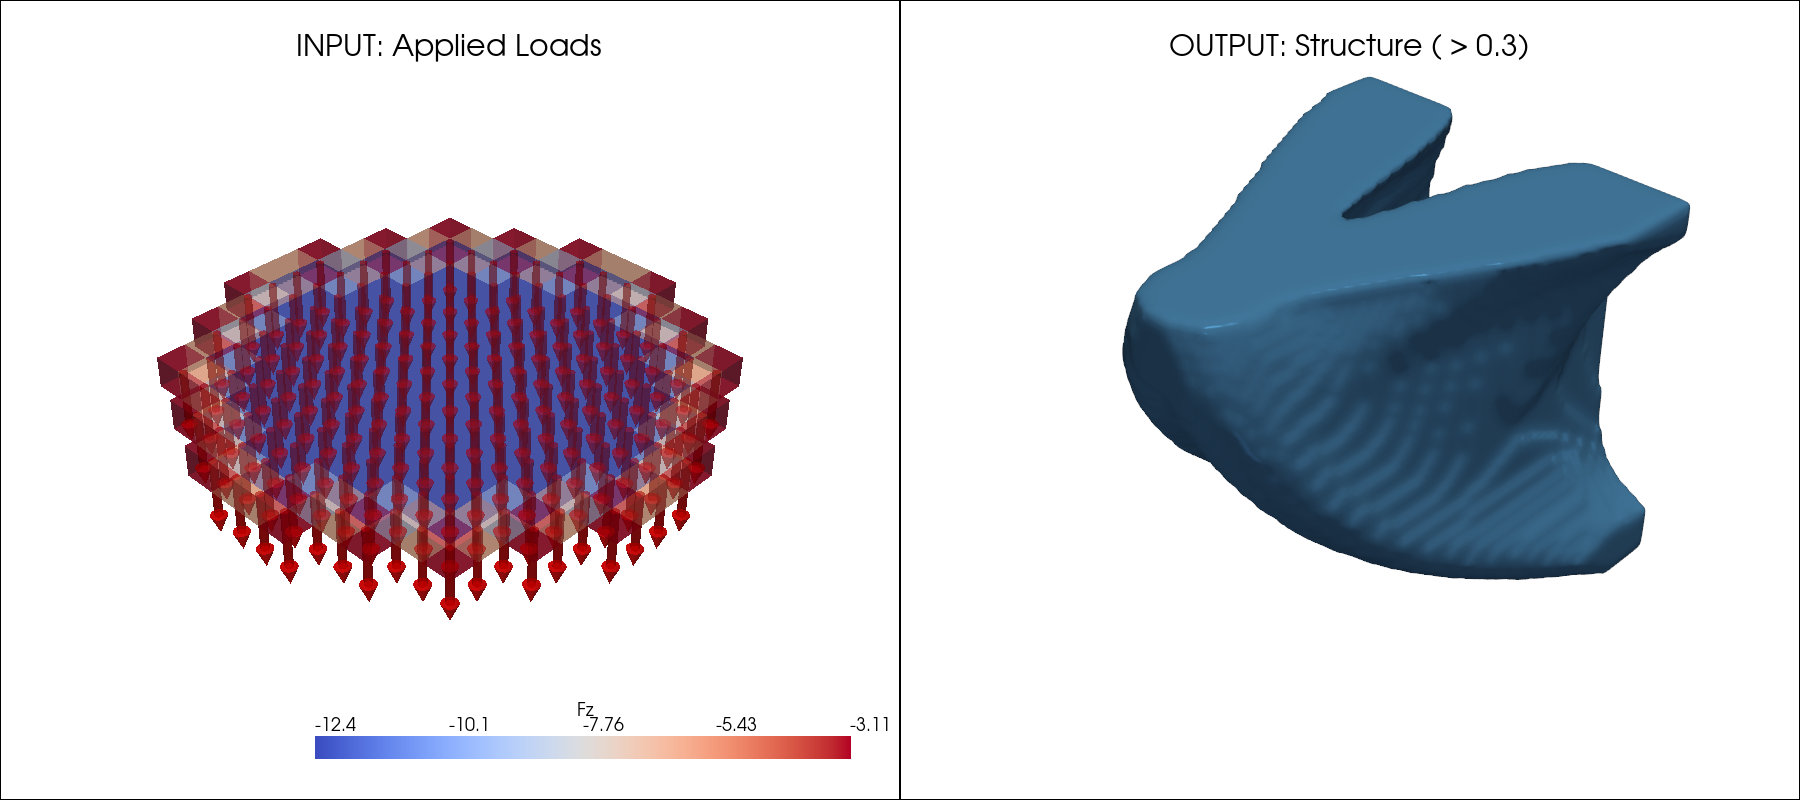

  ✅ Sample 0001 validated


Sample: 0002

  Physical Consistency Checks:
    ✓ Load applied: True (-2000.00 N)
    ✓ Structure exists: True
    ✓ Volume fraction: 0.150
    ✓ Load center: (47.5, 16.5, 63.0)
    ✓ Structure-load distance: 34.6 elements

Sample 0002:
  Input shape: (128, 64, 64, 4)
  Target shape: (128, 64, 64)
  Force sum (Fz): -2000.00 N
  Density range: [0.0000, 1.0000]
  Density mean: 0.1500


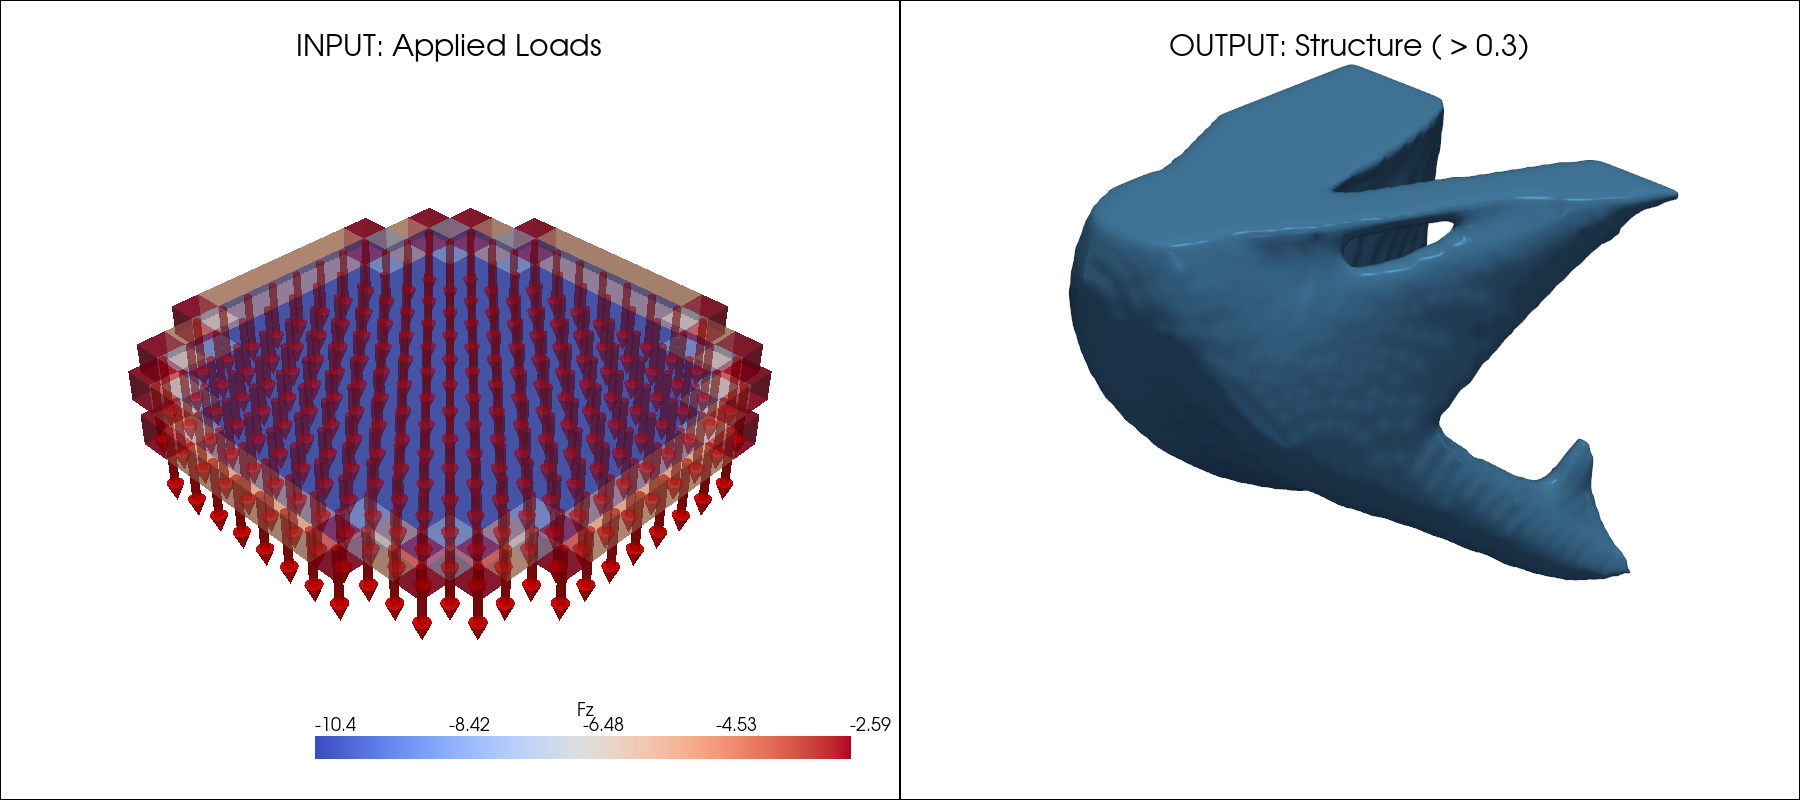

  ✅ Sample 0002 validated


Sample: 0003

  Physical Consistency Checks:
    ✓ Load applied: True (-2000.00 N)
    ✓ Structure exists: True
    ✓ Volume fraction: 0.150
    ✓ Load center: (38.5, 33.5, 63.0)
    ✓ Structure-load distance: 31.1 elements

Sample 0003:
  Input shape: (128, 64, 64, 4)
  Target shape: (128, 64, 64)
  Force sum (Fz): -2000.00 N
  Density range: [0.0000, 1.0000]
  Density mean: 0.1500


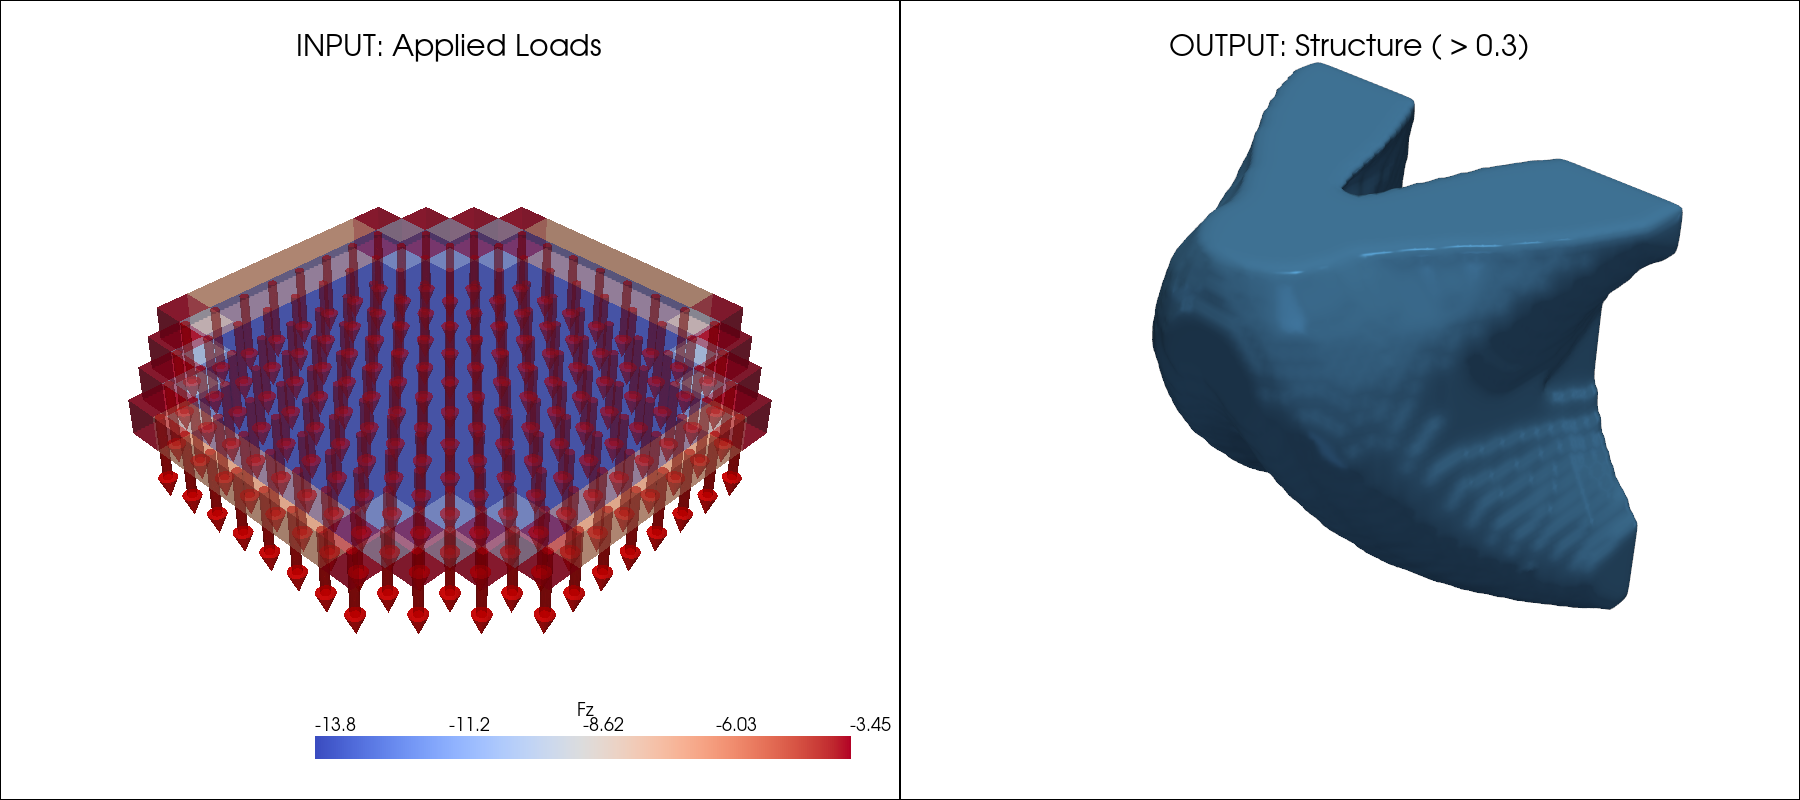

  ✅ Sample 0003 validated


Sample: 0004

  Physical Consistency Checks:
    ✓ Load applied: True (-2000.00 N)
    ✓ Structure exists: True
    ✓ Volume fraction: 0.150
    ✓ Load center: (52.5, 37.5, 63.0)
    ✓ Structure-load distance: 36.8 elements

Sample 0004:
  Input shape: (128, 64, 64, 4)
  Target shape: (128, 64, 64)
  Force sum (Fz): -2000.00 N
  Density range: [0.0000, 1.0000]
  Density mean: 0.1500


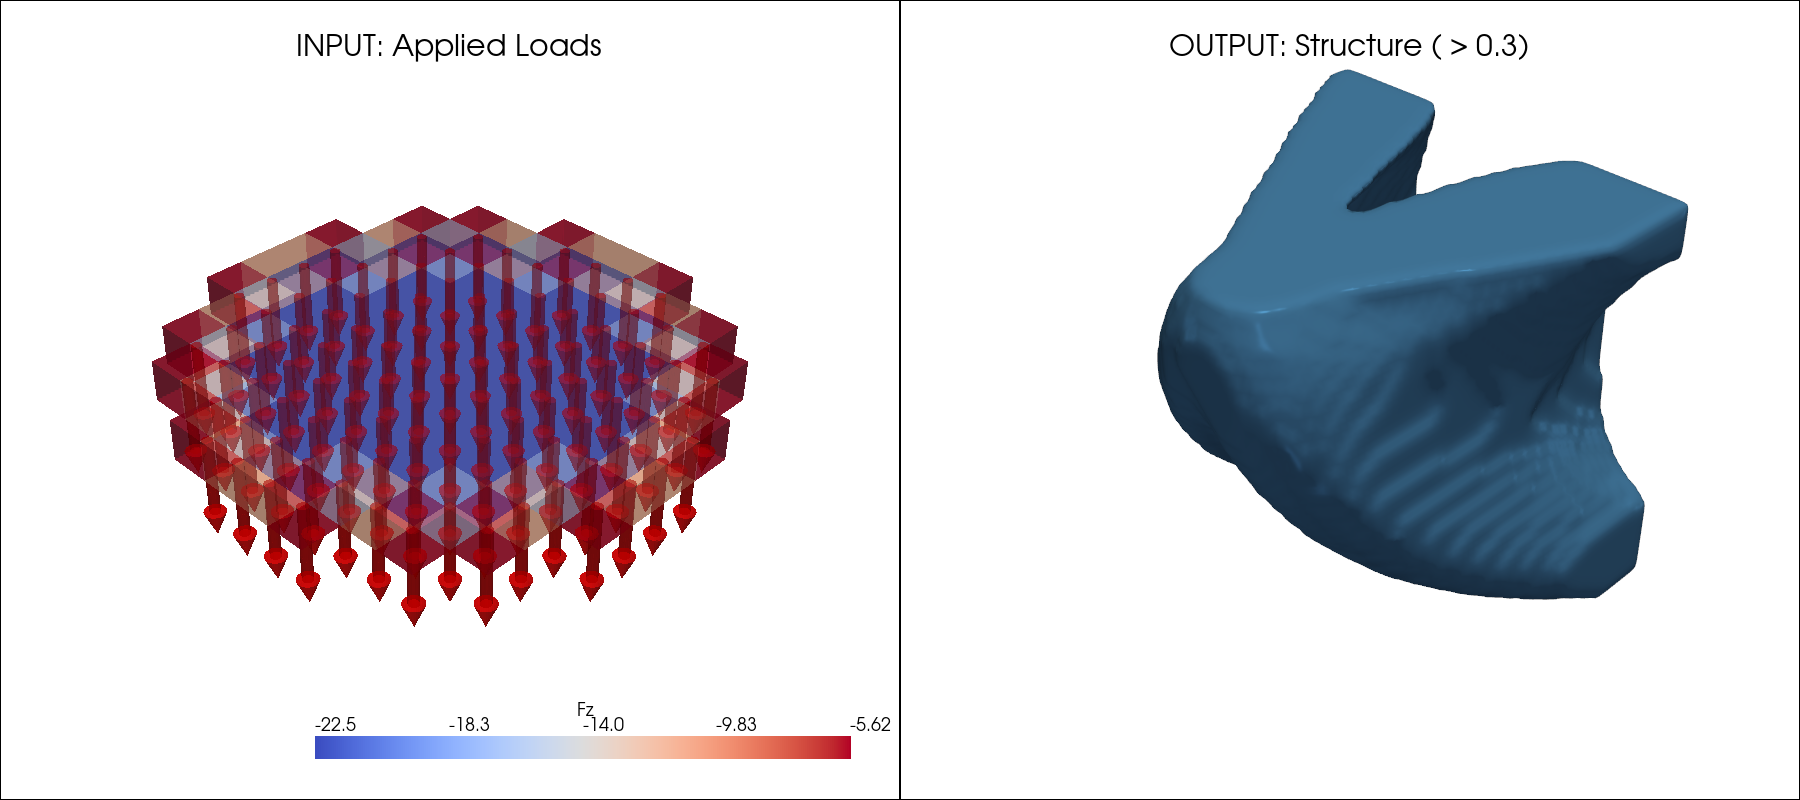

  ✅ Sample 0004 validated


Sample: 0005

  Physical Consistency Checks:
    ✓ Load applied: True (-2000.00 N)
    ✓ Structure exists: True
    ✓ Volume fraction: 0.150
    ✓ Load center: (62.5, 22.5, 63.0)
    ✓ Structure-load distance: 40.9 elements

Sample 0005:
  Input shape: (128, 64, 64, 4)
  Target shape: (128, 64, 64)
  Force sum (Fz): -2000.00 N
  Density range: [0.0000, 1.0000]
  Density mean: 0.1500


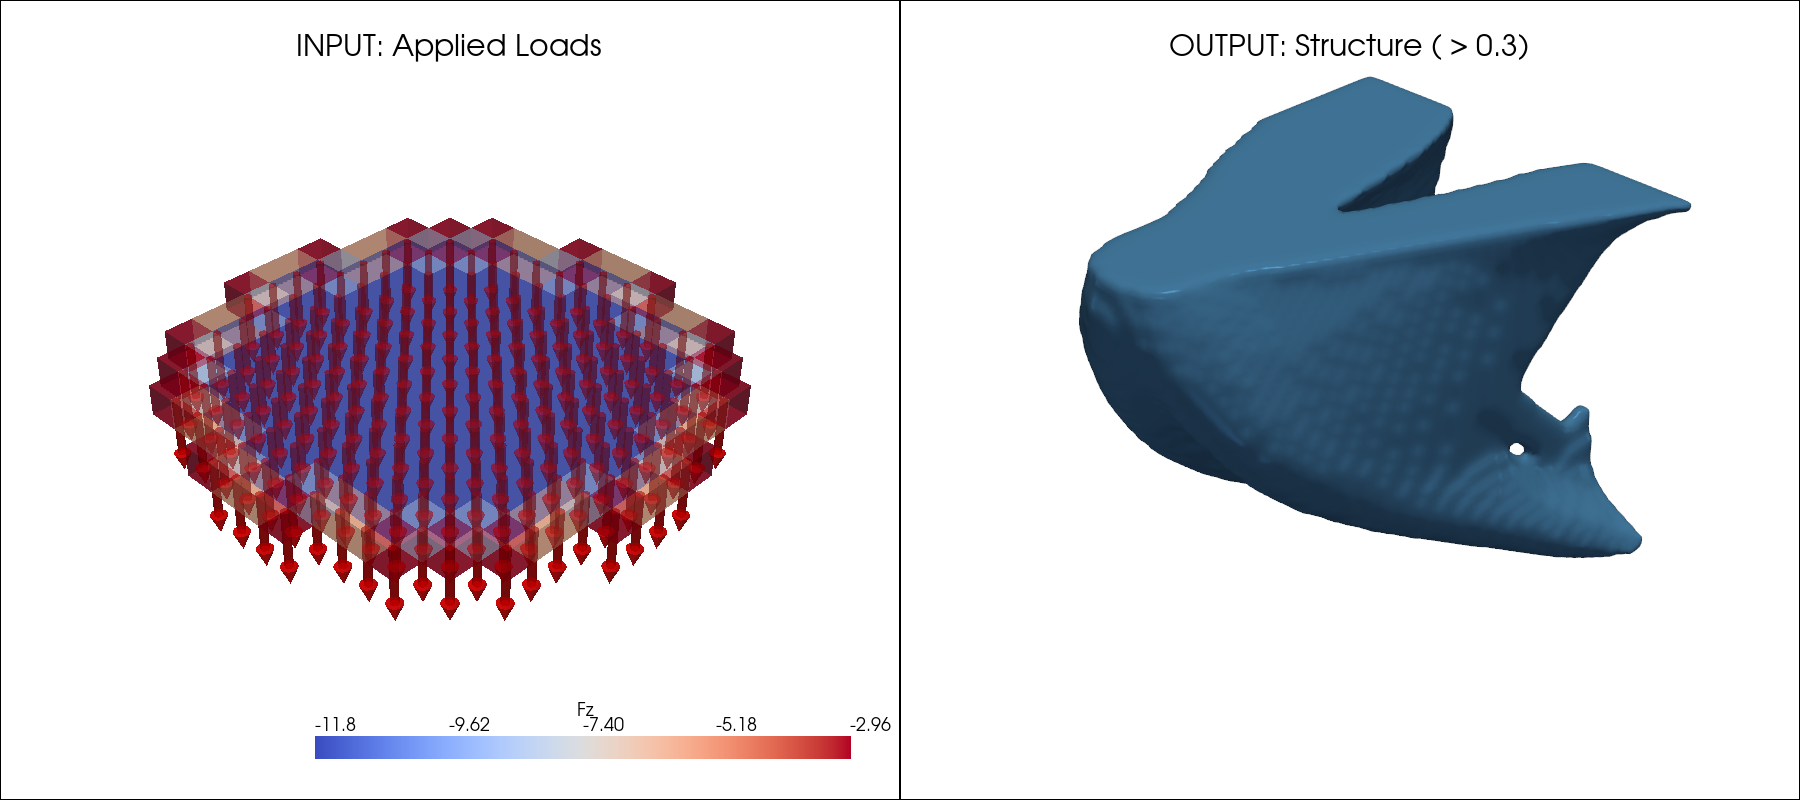

  ✅ Sample 0005 validated



In [48]:
from topopt_ml.io import iterate_samples

# Validate multiple samples
for sid, X, Y in iterate_samples(EXP_PATH, max_samples=15):
    print(f"\n{'='*60}")
    print(f"Sample: {sid}")
    print(f"{'='*60}")
    validate_sample_visual(X, Y, sample_id=sid, threshold=0.3, show_plot=True)